In [188]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.style as style
import seaborn as sns
#sns.set_style('ticks')
%config InlineBackend.figure_format = 'retina'
from matplotlib.pyplot import figure
from IPython.display import Markdown as md
import math

In [189]:
df = pd.read_pickle('nyc-2017-yellow-taxi-trips-to-airport-expanded.pkl.gz')

In [222]:
df = df[df.trip_duration_minutes < 600]

In [223]:
airports = df.dropoff_zone.unique().astype('str')

In [224]:
md(("# In 2017 there were {:,} Yello Taxi trips to one of the three airports:\n"+
   "# * {}\n"+
   "# * {}\n"+
   "# * {}\n").format(df.shape[0], *airports))

# In 2017 there were 2,502,936 Yello Taxi trips to one of the three airports:
# * JFK Airport
# * LaGuardia Airport
# * Newark Airport


In [225]:
df_ewr = df[df.dropoff_zone == 'Newark Airport']

In [226]:
(df_ewr.trip_duration_minutes > 1200).mean()

0.0

In [227]:
def display_quantile_table(title, df):
    q = [.25,.50,.75,.80,.85,.90,.95,.98,.99]
    qmins = np.quantile(df.trip_duration_minutes, q)
    def table_row(p,m):
        return "|{}%|&leq;{}|".format(int(100*p), int(round(m)))
    table_head = [title,"","|%|duration in minutes|", "|:-:|:---:|"]
    table = table_head + [table_row(p,q) for p,q in zip(q, qmins)]
    return md("\n".join(table))

In [228]:
md(("# {:,} of them were headed to Newark Airport").format(df_ewr.shape[0]))

# 216,018 of them were headed to Newark Airport

In [229]:
display_quantile_table("### All trips to Newark Airport", df)

### All trips to Newark Airport

|%|duration in minutes|
|:-:|:---:|
|25%|&leq;24|
|50%|&leq;33|
|75%|&leq;46|
|80%|&leq;50|
|85%|&leq;55|
|90%|&leq;62|
|95%|&leq;72|
|98%|&leq;84|
|99%|&leq;93|

In [230]:
df_mh_ewr = df_ewr[df_ewr.pickup_zone == 'Murray Hill']

In [231]:
df_mh_ewr.shape

(6899, 13)

In [232]:
md(("# {:,} of them were trips from Murray Hill to Newark Airport").format(df_mh_ewr.shape[0]))

# 6,899 of them were trips from Murray Hill to Newark Airport

In [233]:
display_quantile_table("### Trips from Murray Hill to Newark Airport", df_mh_ewr)

### Trips from Murray Hill to Newark Airport

|%|duration in minutes|
|:-:|:---:|
|25%|&leq;34|
|50%|&leq;41|
|75%|&leq;52|
|80%|&leq;56|
|85%|&leq;60|
|90%|&leq;66|
|95%|&leq;77|
|98%|&leq;90|
|99%|&leq;102|

In [234]:
df_mh_ewr_wd = df_mh_ewr[df_mh_ewr.dropoff_datetime.dt.day < 5]

In [235]:
md(("# {:,} of them were on a weekday").format(df_mh_ewr_wd.shape[0]))

# 887 of them were on a weekday

In [236]:
display_quantile_table("### Trips from Murray Hill to Newark Airport on a week day", df_mh_ewr_wd)

### Trips from Murray Hill to Newark Airport on a week day

|%|duration in minutes|
|:-:|:---:|
|25%|&leq;32|
|50%|&leq;39|
|75%|&leq;48|
|80%|&leq;52|
|85%|&leq;55|
|90%|&leq;62|
|95%|&leq;71|
|98%|&leq;81|
|99%|&leq;92|

In [237]:
df_mh_ewr_fr = df_mh_ewr[df_mh_ewr.dropoff_datetime.dt.day == 4]

In [238]:
md(("# {:,} of them were on a friday").format(df_mh_ewr_fr.shape[0]))

# 188 of them were on a friday

In [239]:
display_quantile_table("### Trips from Murray Hill to Newark Airport on a Friday", df_mh_ewr_wd)

### Trips from Murray Hill to Newark Airport on a Friday

|%|duration in minutes|
|:-:|:---:|
|25%|&leq;32|
|50%|&leq;39|
|75%|&leq;48|
|80%|&leq;52|
|85%|&leq;55|
|90%|&leq;62|
|95%|&leq;71|
|98%|&leq;81|
|99%|&leq;92|

In [240]:
def foo(x):
    return 10**math.ceil(math.log10(x/20))
foo(300)

100

In [338]:
def duration_hist(df, title, y_scale_log=False, cumulative=False):
    figure(figsize=(6,3))
    maxmins = int(df.trip_duration_minutes.max())
    step = 10**math.ceil(math.log10(maxmins/50))
    if maxmins/step < 10:
        step = int(step/2)
    df.trip_duration_minutes.hist(bins=range(0, maxmins, step),
                                  rwidth=.9, align='mid')
    if y_scale_log:
        plt.yscale('log')
    plt.xlabel('trip duration in minutes')
    plt.ylabel('count of trips')
    plt.xticks(range(0, maxmins, step), rotation=90);
    plt.title(("{:,} " + title).format(df.shape[0]))
    plt.savefig(title.replace(' ','_')+'.png', dpi=1200)

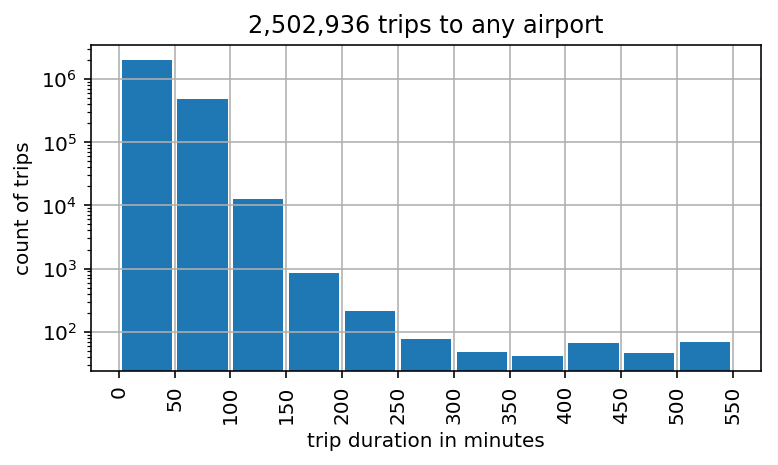

In [339]:
duration_hist(df, "trips to any airport", y_scale_log=1)

In [340]:
df.trip_duration_minutes.quantile(.99)

92.96666666666667

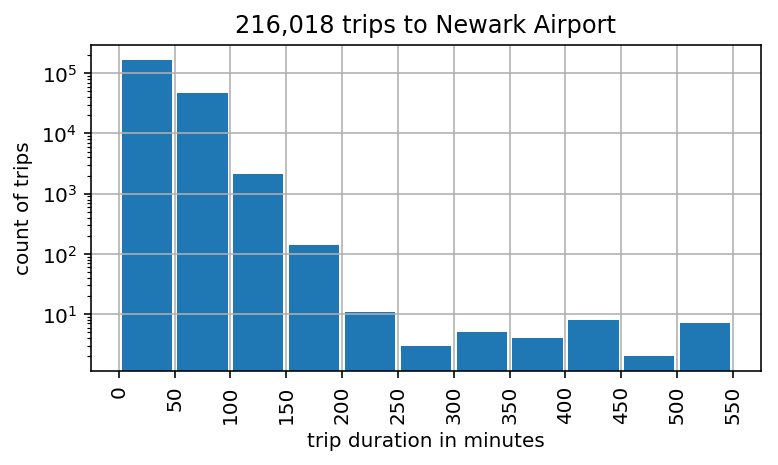

In [341]:
duration_hist(df_ewr, "trips to Newark Airport", y_scale_log=1)

In [345]:
df_ewr.trip_duration_minutes.quantile(.99)

101.55

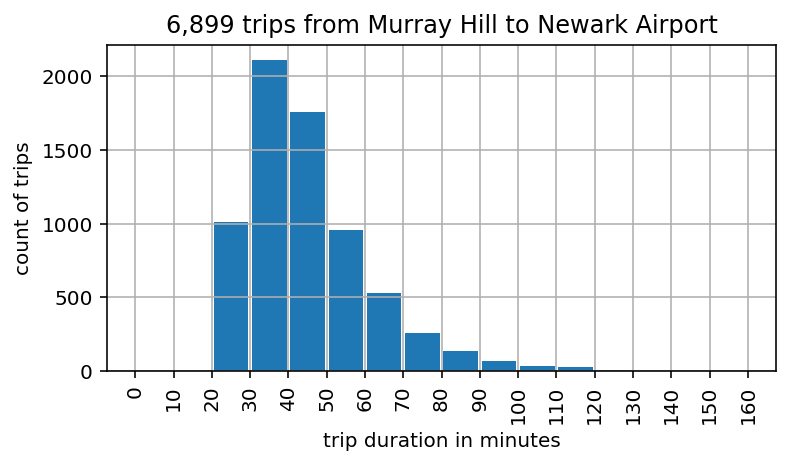

In [342]:
duration_hist(df_mh_ewr, "trips from Murray Hill to Newark Airport", y_scale_log=0)

In [346]:
df_mh_ewr.trip_duration_minutes.quantile(.99)

101.63333333333293

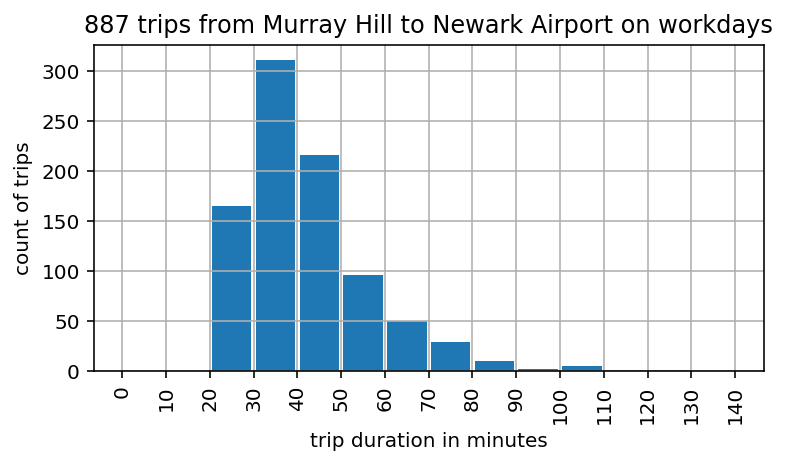

In [343]:
duration_hist(df_mh_ewr_wd, "trips from Murray Hill to Newark Airport on workdays", y_scale_log=0)

In [347]:
df_mh_ewr_wd.trip_duration_minutes.quantile(.99)

92.42299999999996

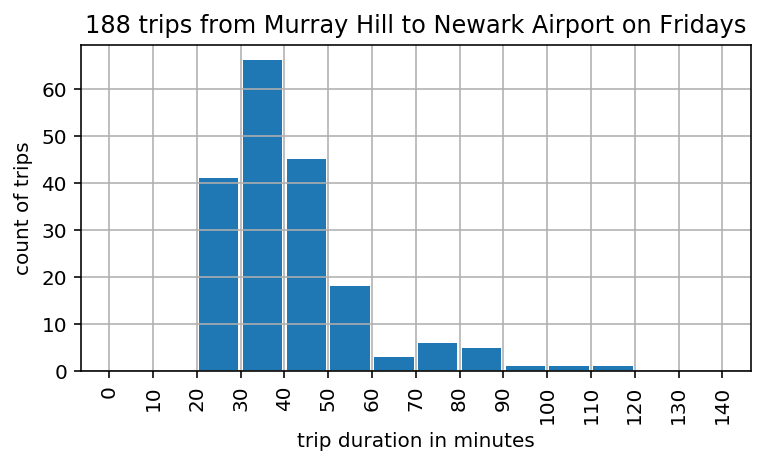

In [344]:
duration_hist(df_mh_ewr_fr, "trips from Murray Hill to Newark Airport on Fridays")

In [348]:
df_mh_ewr_fr.trip_duration_minutes.quantile(.99)

108.56983333333328

In [354]:
df_mh_ewr_17 = df_mh_ewr[df_mh_ewr.dropoff_hour == 17]
df_ewr_17 = df_ewr[df_ewr.dropoff_hour == 17]
df_mh_ewr_fr_17 = df_mh_ewr_fr[df_mh_ewr_fr.dropoff_hour == 17]

In [369]:
df_mh_ewr_16 = df_mh_ewr[df_mh_ewr.dropoff_hour.isin([16,17])]
df_ewr_16 = df_ewr[df_ewr.dropoff_hour.isin([16,17])]
#df_mh_ewr_fr_16 = df_mh_ewr_fr[df_mh_ewr_fr.isin([16,17])]

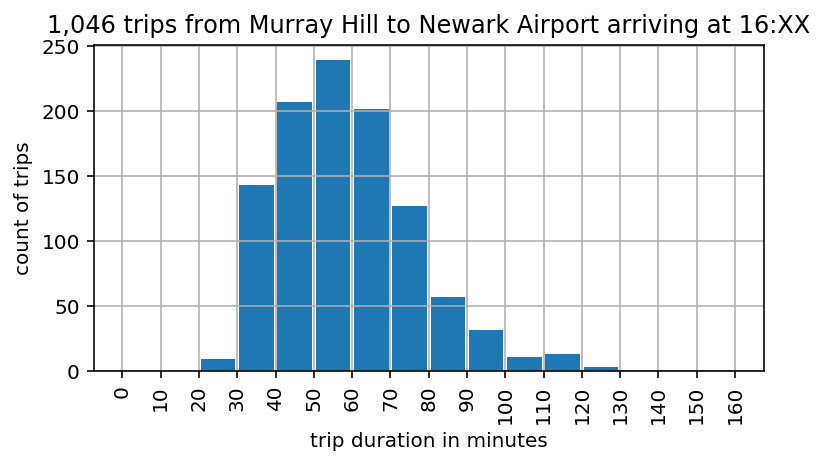

In [370]:
duration_hist(df_mh_ewr_16, "trips from Murray Hill to Newark Airport arriving at 16:XX")

In [373]:
df_mh_ewr_17.trip_duration_minutes.quantile(.99)

123.73933333333336

In [333]:
(df_mh_ewr.trip_duration_minutes > 200).sum()

0

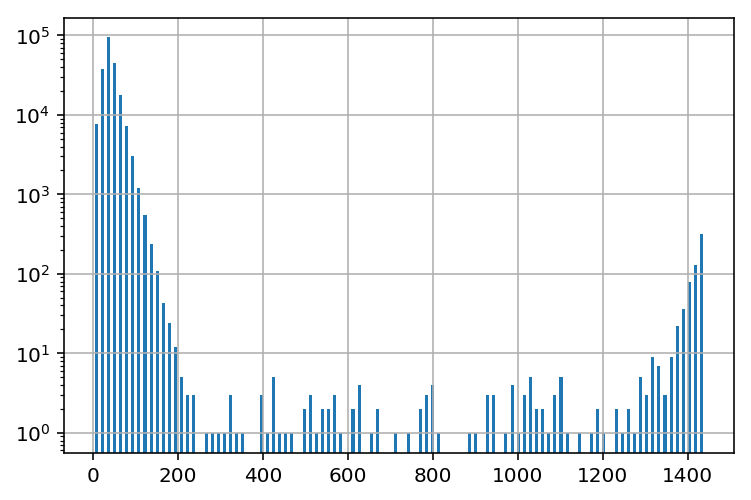

In [149]:
df_ewr.trip_duration_minutes.hist(bins=100,rwidth=.5)
plt.yscale('log')

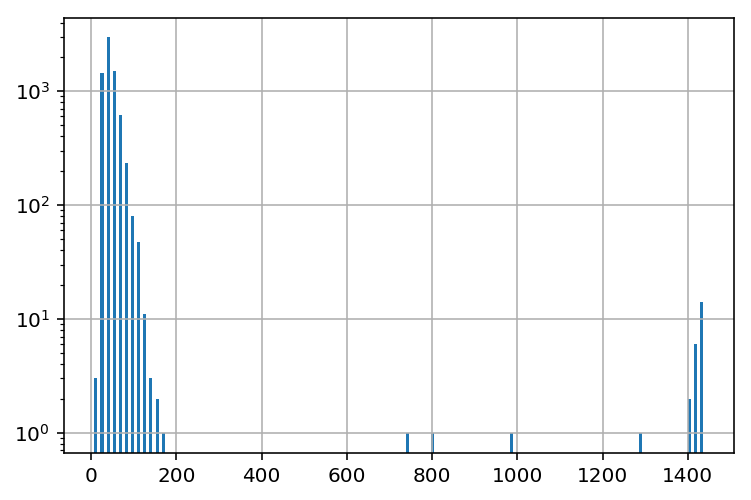

In [45]:
df_mh_ewr.trip_duration_minutes.hist(bins=100,rwidth=.5)
plt.yscale('log')

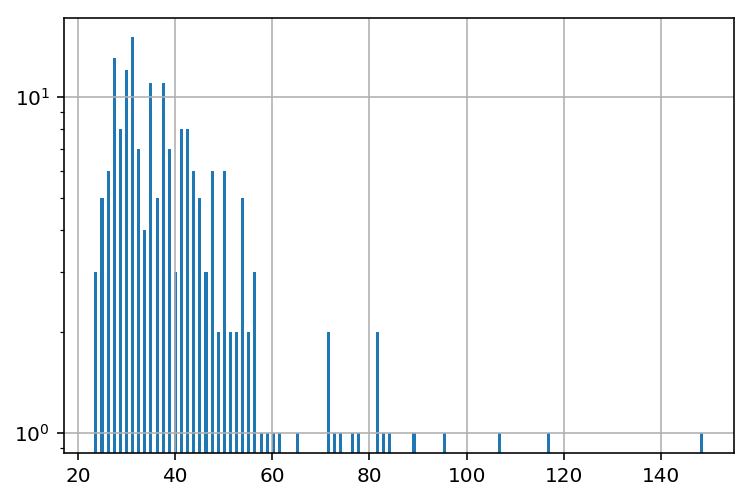

In [47]:
df_mh_ewr_fr.trip_duration_minutes.hist(bins=100,rwidth=.5)
plt.yscale('log')

KeyboardInterrupt: 

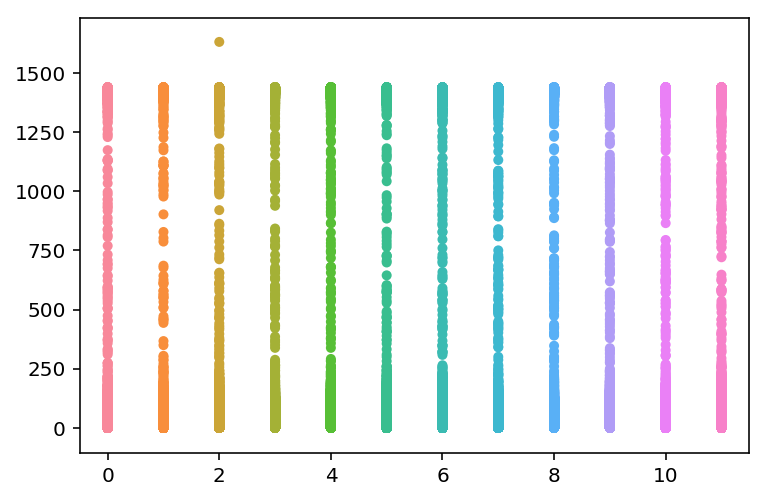

In [67]:
sns.swarmplot(x=df.dropoff_month, y=df.trip_duration_minutes)

In [ ]:
plt.scatter(x=df.dropoff_zone, y=df.trip_duration_minutes)